In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/apple_products.csv')

In [ ]:

df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [ ]:
df.isnull().sum()

,0
Product Name,0
Product URL,0
Brand,0
Sale Price,0
Mrp,0
Discount Percentage,0
Number Of Ratings,0
Number Of Reviews,0
Upc,0
Star Rating,0


In [ ]:
df=df.drop('Product URL',axis=1);

In [ ]:
df

,Product Name,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB
...,...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,4 GB


In [ ]:
df=df.drop('Upc',axis=1);
df

,Product Name,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",Apple,49900,49900,0,3431,356,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB
...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",Apple,29999,39900,24,95909,8161,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB


In [ ]:
import re
import pandas as pd

# Extract Color
df['Color'] = df['Product Name'].apply(lambda x: re.search(r'\((.*?),', x).group(1).strip() if pd.notnull(x) and re.search(r'\((.*?),', x) else None)

# Extract Storage
df['Storage'] = df['Product Name'].apply(lambda x: re.search(r',\s*(\d+\s*GB)', x).group(1).strip() if pd.notnull(x) and re.search(r',\s*(\d+\s*GB)', x) else None)
df['Product Name'] = df['Product Name'].apply(lambda x: x.split('(')[0].strip() if isinstance(x, str) else x)
# See the updated DataFrame
print(df.head())


          Product Name  Brand  Sale Price    Mrp  Discount Percentage  \
0  APPLE iPhone 8 Plus  Apple       49900  49900                    0   
1  APPLE iPhone 8 Plus  Apple       84900  84900                    0   
2  APPLE iPhone 8 Plus  Apple       84900  84900                    0   
3       APPLE iPhone 8  Apple       77000  77000                    0   
4       APPLE iPhone 8  Apple       77000  77000                    0   

   Number Of Ratings  Number Of Reviews  Star Rating   Ram       Color Storage  
0               3431                356          4.6  2 GB        Gold   64 GB  
1               3431                356          4.6  2 GB  Space Grey  256 GB  
2               3431                356          4.6  2 GB      Silver  256 GB  
3              11202                794          4.5  2 GB      Silver  256 GB  
4              11202                794          4.5  2 GB        Gold  256 GB  


<Axes: xlabel='Sale Price', ylabel='Mrp'>

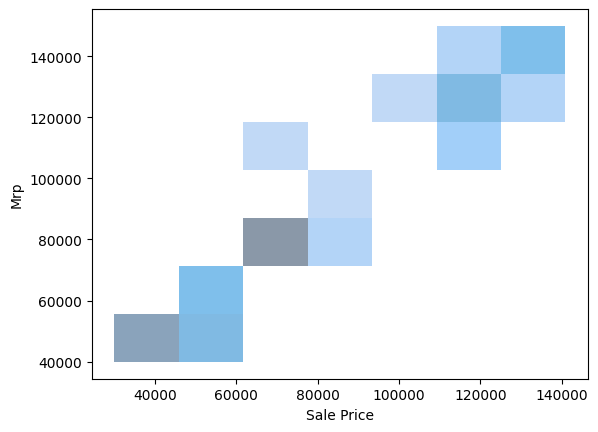

In [ ]:
sns.histplot(x='Sale Price',y='Mrp',data=df,alpha=0.6,kde=False)

<Axes: xlabel='Ram', ylabel='Star Rating'>

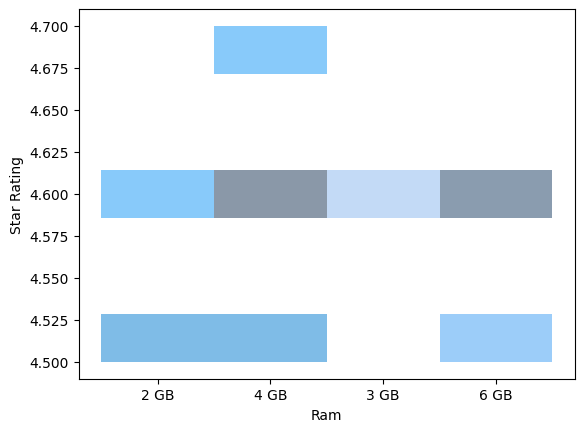

In [ ]:
sns.histplot(x='Ram',y='Star Rating',data=df,alpha=0.6,kde=False)

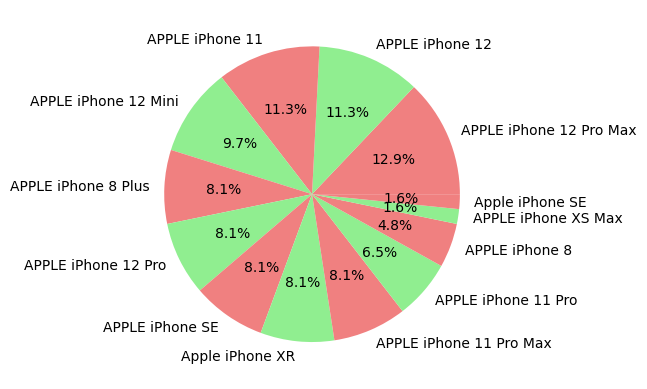

In [ ]:
df['Product Name'].value_counts().plot.pie(autopct='%1.1f%%',colors=['lightcoral','lightgreen'])
plt.ylabel('')
plt.show()

In [ ]:

data=df['Product Name'].unique()
data

array(['APPLE iPhone 8 Plus', 'APPLE iPhone 8', 'APPLE iPhone XS Max',
       'Apple iPhone XR', 'APPLE iPhone 11 Pro Max',
       'APPLE iPhone 11 Pro', 'Apple iPhone SE', 'APPLE iPhone 12 Pro',
       'APPLE iPhone 12 Pro Max', 'APPLE iPhone 12 Mini',
       'APPLE iPhone 12', 'APPLE iPhone 11', 'APPLE iPhone SE'],
      dtype=object)

In [ ]:
df.size

682

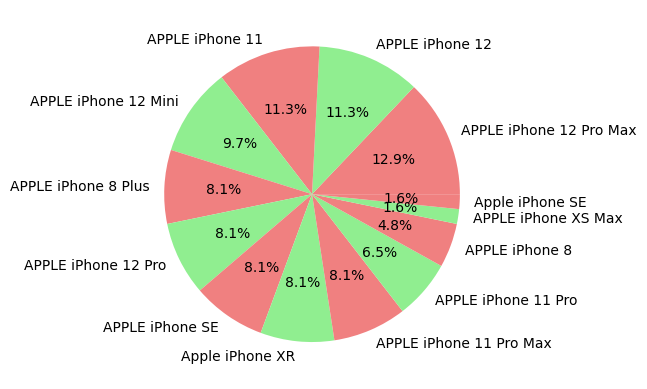

In [ ]:
df['Product Name'].value_counts().plot.pie(autopct='%1.1f%%',colors=['lightcoral','lightgreen'])
plt.ylabel('')
plt.show()

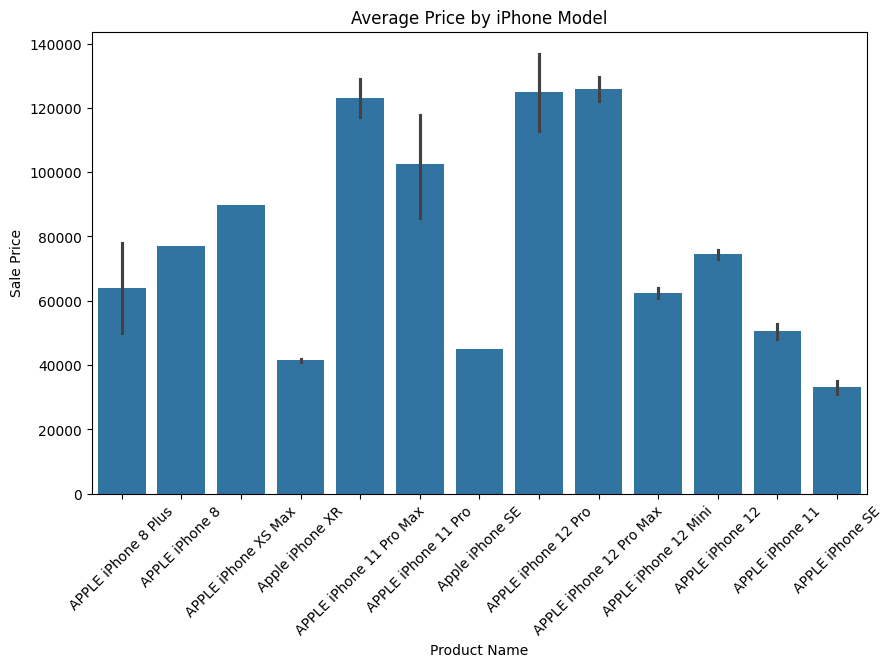

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Name', y='Sale Price', data=df, estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Price by iPhone Model")
plt.show()


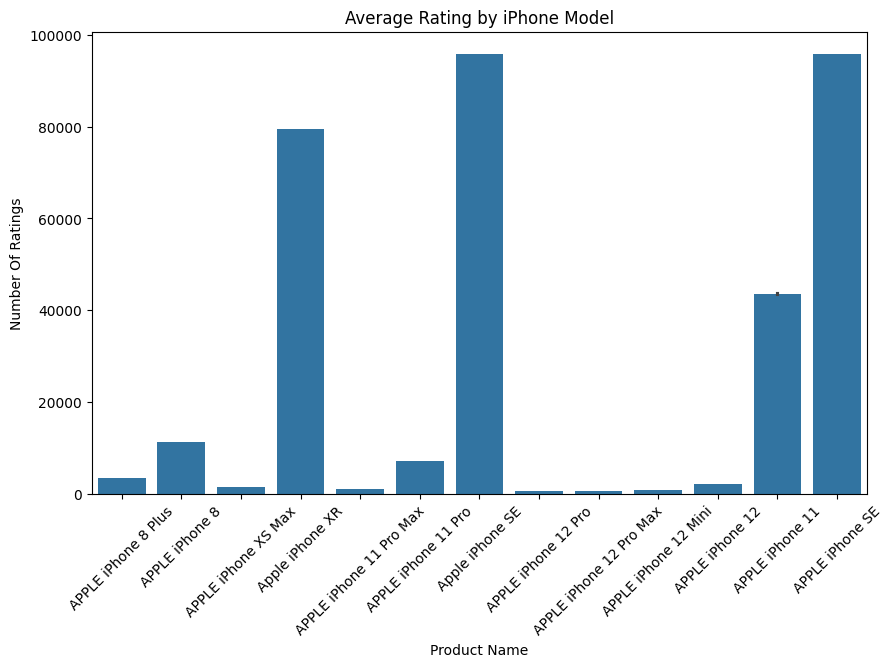

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Name', y='Number Of Ratings', data=df, estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Rating by iPhone Model")
plt.show()


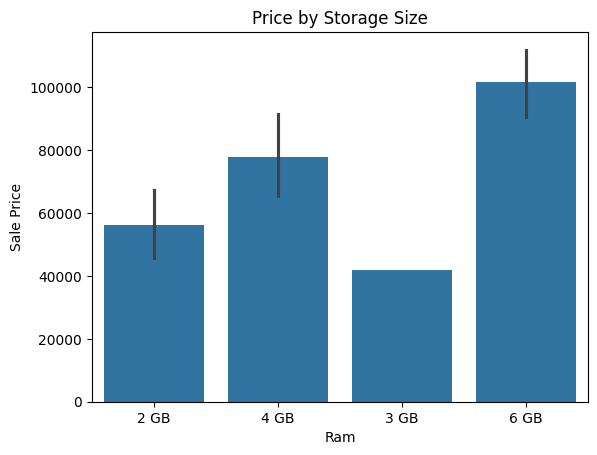

In [ ]:
sns.barplot(x='Ram', y='Sale Price', data=df)
plt.title("Price by Storage Size")
plt.show()


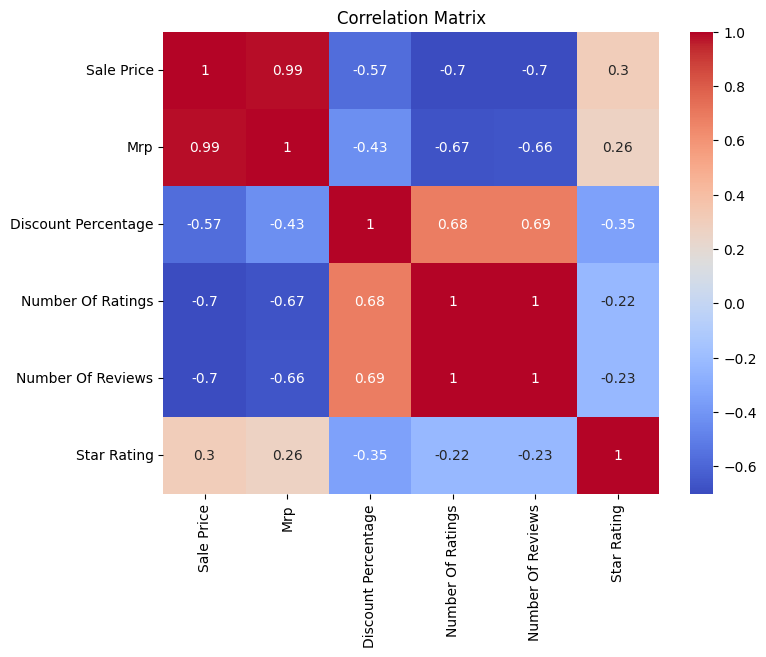

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.to_csv('iphone_sales_clean.csv', index=False)



In [ ]:
from google.colab import files
files.download('iphone_sales_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,Product Name,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating,Ram,Color,Storage
0,APPLE iPhone 8 Plus,Apple,49900,49900,0,3431,356,4.6,2 GB,Gold,64 GB
1,APPLE iPhone 8 Plus,Apple,84900,84900,0,3431,356,4.6,2 GB,Space Grey,256 GB
2,APPLE iPhone 8 Plus,Apple,84900,84900,0,3431,356,4.6,2 GB,Silver,256 GB
3,APPLE iPhone 8,Apple,77000,77000,0,11202,794,4.5,2 GB,Silver,256 GB
4,APPLE iPhone 8,Apple,77000,77000,0,11202,794,4.5,2 GB,Gold,256 GB
...,...,...,...,...,...,...,...,...,...,...,...
57,APPLE iPhone SE,Apple,29999,39900,24,95909,8161,4.5,4 GB,Black,64 GB
58,APPLE iPhone 11,Apple,46999,54900,14,43470,3331,4.6,4 GB,Purple,64 GB
59,APPLE iPhone 11,Apple,46999,54900,14,43470,3331,4.6,4 GB,White,64 GB
60,APPLE iPhone 11,Apple,46999,54900,14,43470,3331,4.6,4 GB,Black,64 GB
